In [1]:
import reader
import utils
import visualization as vis
from PIL import Image
import numpy as np
import cv2
import datagen
import matplotlib.pyplot as plt

In [2]:
# Read data
kitti_reader = reader.KittiReader()

rot global  86.4933037830348
angle: 115.16451682129545


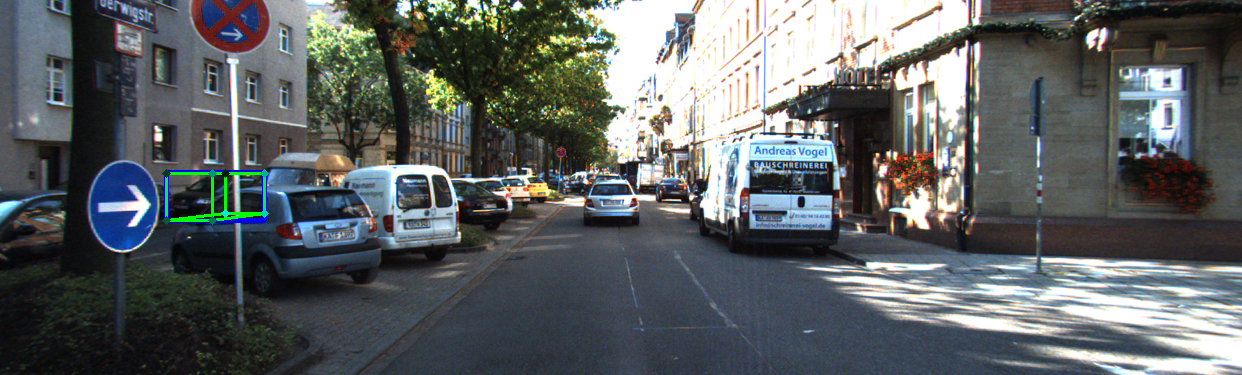

In [3]:
# Visualize
j = 325
obj = kitti_reader.image_data[j]
image_path = obj['image']
calib_path = obj['calib']
K = reader.KittiReader.read_intrinsic_matrix(calib_path)
image_data = list(filter(lambda rec: rec['image'] == image_path, kitti_reader.image_data))
img = cv2.imread(image_path)

cv2.rectangle(img, (obj['xmin'], obj['ymin']), (obj['xmax'], obj['ymax']), (255, 0, 0), 4)
coords_3d = utils.compute_3d_coordinates(K,
                                    obj['trans'], 
                                    obj['alpha'], 
                                    obj['dims'], 
                                    (obj['xmin'], obj['ymin'], obj['xmax'], obj['ymax']))
coords_2d = utils.project_2d(K, coords_3d)
vis.draw_3d_box(img, coords_2d)
print("angle:", 180 * obj['alpha'] / np.pi)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(img)

rot local  115.16451682129545
Annot angle:  2.01 Recovered angle :  2.01
rot global  86.4933037830348
bbox :  (166, 172, 264, 220)
 pi/2 < rot local < pi
shape:  (3, 4)
bbox[0]  166
bbox[2]  264
Annot dims:  [1.66 1.54 4.34] Recovered dims :  [1.66 1.54 4.34]
Annot translation :  [-14.83   1.67  27.31]  Recovered trans;ation :  [ 1.69  1.62 -3.47]
rot global  86.4933037830348


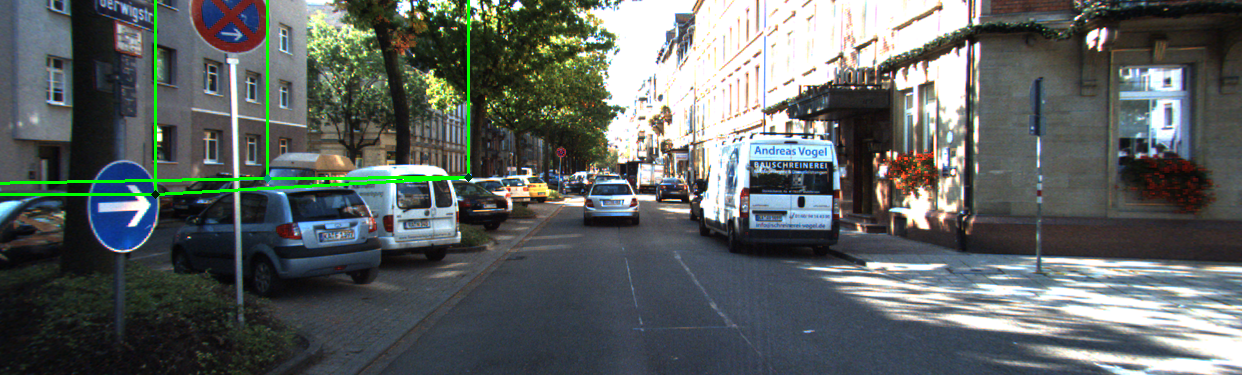

In [4]:
gen = datagen.BatchGenerator(kitti_reader, jitter = True, mode = 'train')

x, y = gen.__getitem__(0)

x = gen.visualize(325)
Image.fromarray(cv2.cvtColor(x[0], cv2.COLOR_BGR2RGB))